In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/bike_rental_uci.csv', sep = ';')

In [2]:
df.head()

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


In [3]:
df.shape

(7689, 12)

In [4]:
df.columns

Index(['id', 'year', 'hour', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


In [6]:
df.describe()

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,5463.266224,2011.495513,11.565353,2.506178,0.029002,0.677331,1.410066,20.267085,23.696581,61.771492,12.802070,191.419430
std,3144.709810,0.500012,6.915777,1.115935,0.167824,0.467528,0.628004,7.824066,8.514199,19.302151,8.178889,182.140265
min,3.000000,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2771.000000,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,5477.000000,2011.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,8186.000000,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,10886.000000,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [7]:
df.set_index('id', inplace =True)
df.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
id,,,,,,,,,,,
3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


In [20]:
df.drop(['year'], axis=1).corr()

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
hour,1.000000,-0.009175,0.008397,0.004692,-0.035536,0.141174,0.136258,-0.291525,0.154647,0.404101
season,-0.009175,1.000000,0.026477,-0.008520,0.009470,0.260488,0.267093,0.193385,-0.154860,0.156477
holiday,0.008397,0.026477,1.000000,-0.250398,0.001919,-0.006227,-0.011051,0.002408,0.010540,-0.009934
workingday,0.004692,-0.008520,-0.250398,1.000000,0.036050,0.044854,0.038954,-0.004986,0.007559,0.019586
weather,-0.035536,0.009470,0.001919,0.036050,1.000000,-0.060876,-0.059855,0.402462,0.004326,-0.126210
temp,0.141174,0.260488,-0.006227,0.044854,-0.060876,1.000000,0.985087,-0.061989,-0.022017,0.397235
atemp,0.136258,0.267093,-0.011051,0.038954,-0.059855,0.985087,1.000000,-0.040272,-0.060632,0.392014
humidity,-0.291525,0.193385,0.002408,-0.004986,0.402462,-0.061989,-0.040272,1.000000,-0.322416,-0.324662
windspeed,0.154647,-0.154860,0.010540,0.007559,0.004326,-0.022017,-0.060632,-0.322416,1.000000,0.108320
count,0.404101,0.156477,-0.009934,0.019586,-0.126210,0.397235,0.392014,-0.324662,0.108320,1.000000


<Figure size 1080x720 with 0 Axes>

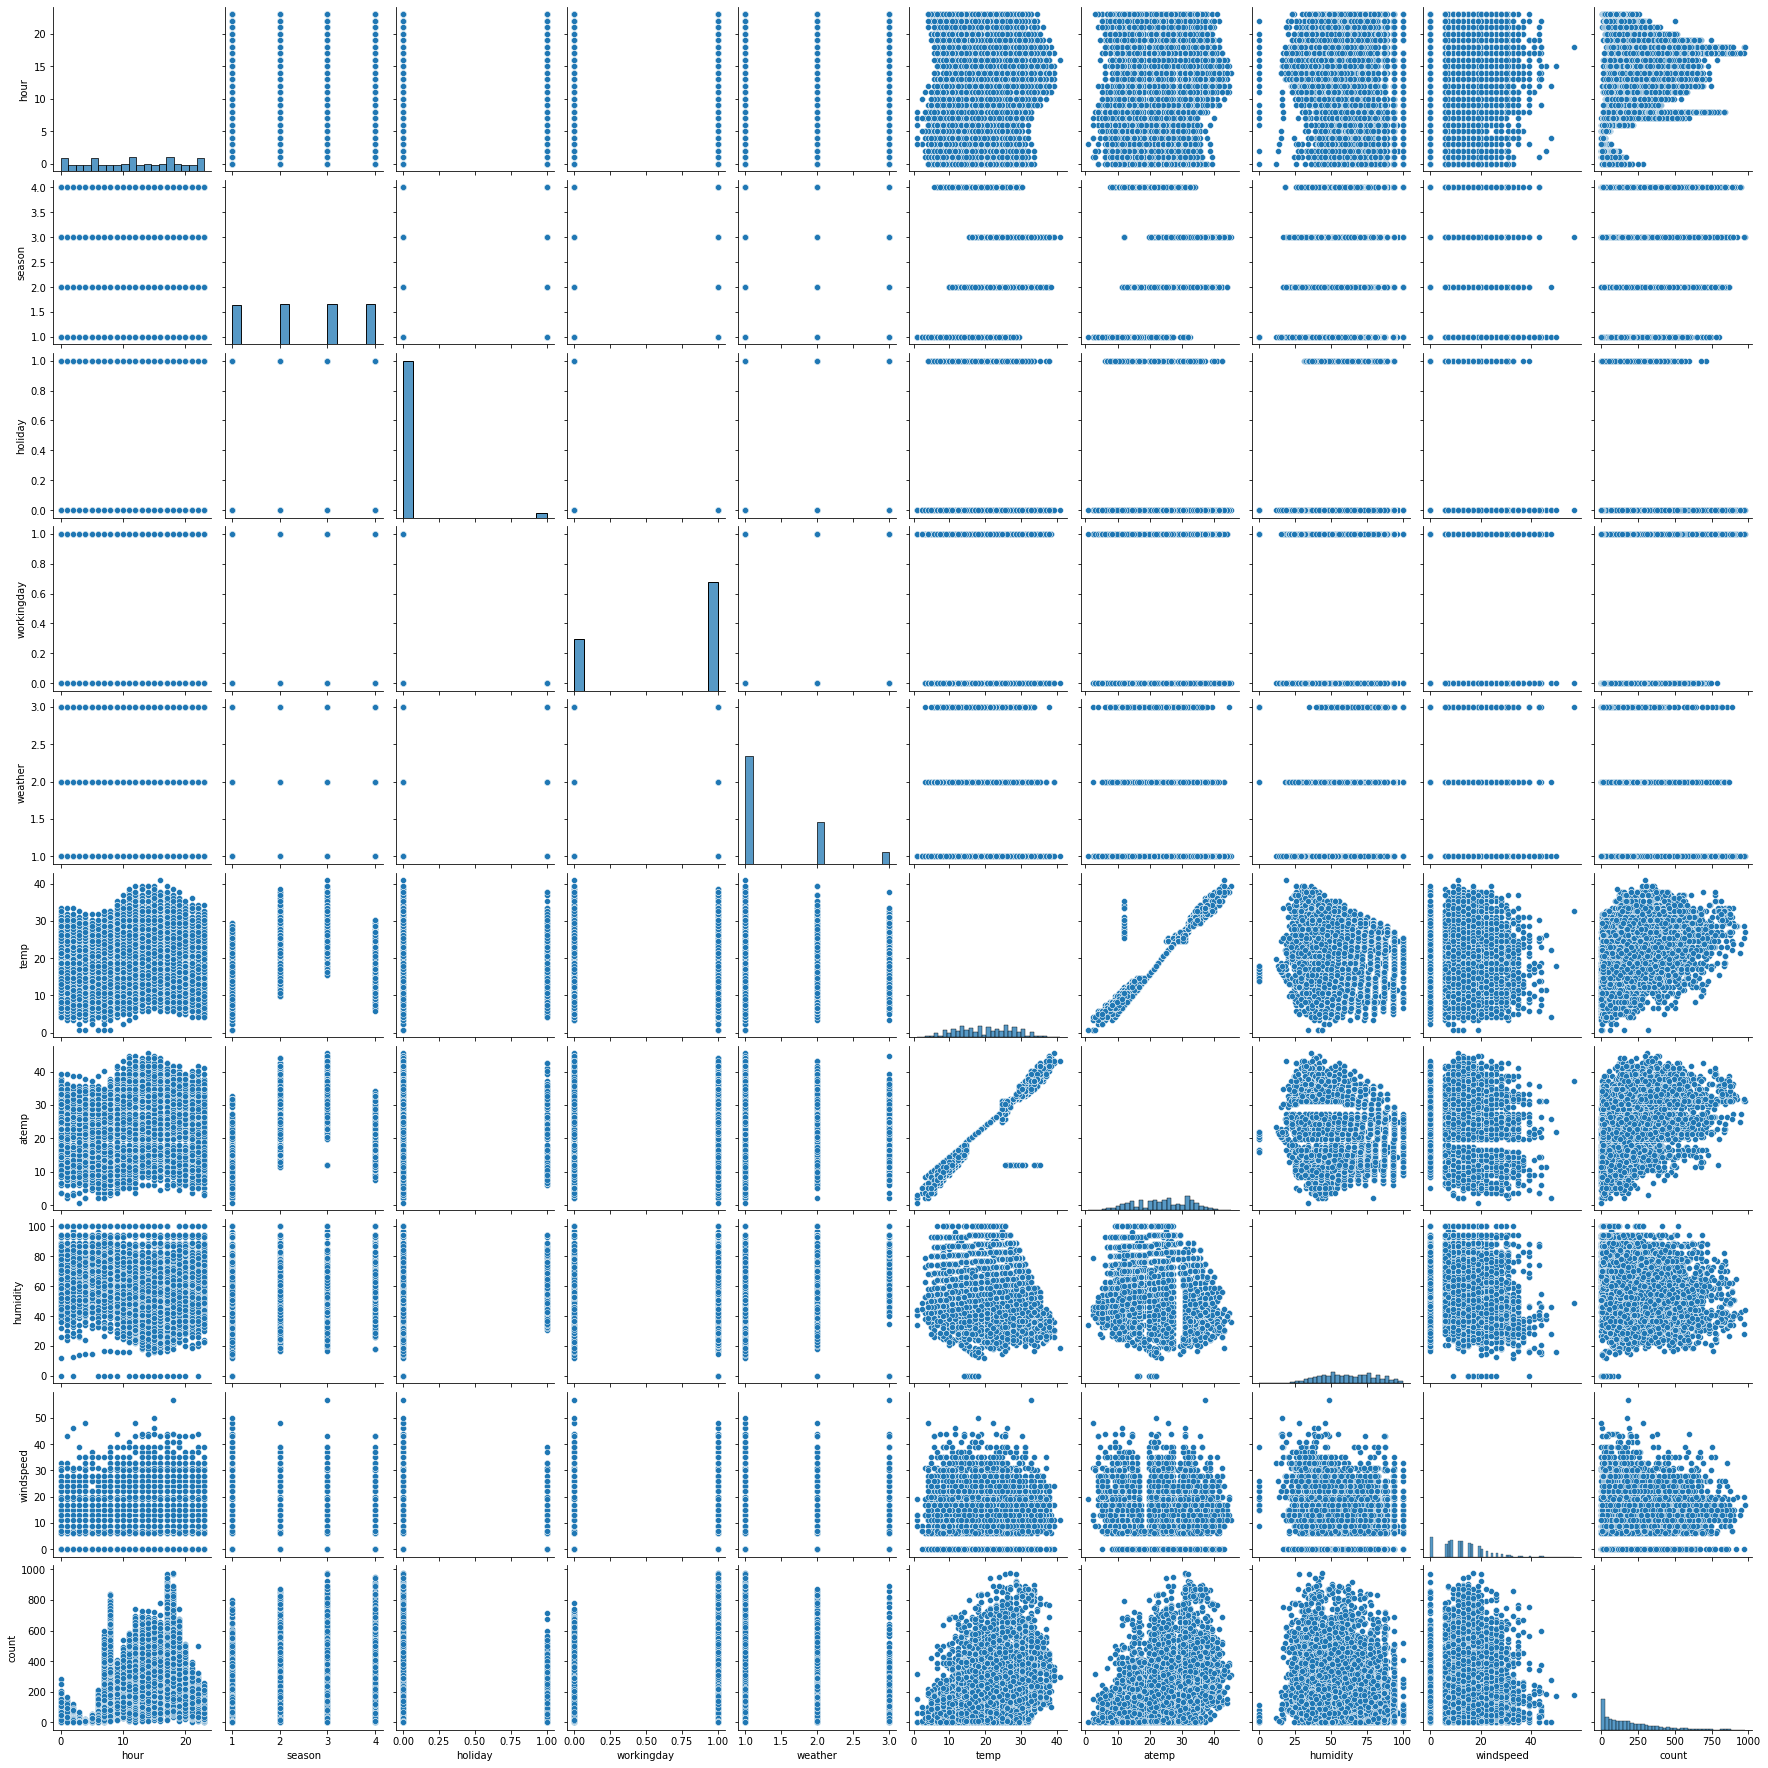

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(df.drop(['year'], axis=1))

In [8]:
df['year'].value_counts()

2011    3879
2012    3810
Name: year, dtype: int64

In [9]:
df['hour'].value_counts()

17    343
11    335
1     333
14    332
6     329
23    328
19    326
22    326
10    326
12    325
16    323
2     320
20    319
13    319
18    318
5     316
8     313
15    313
7     312
4     311
21    310
0     309
3     303
9     300
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

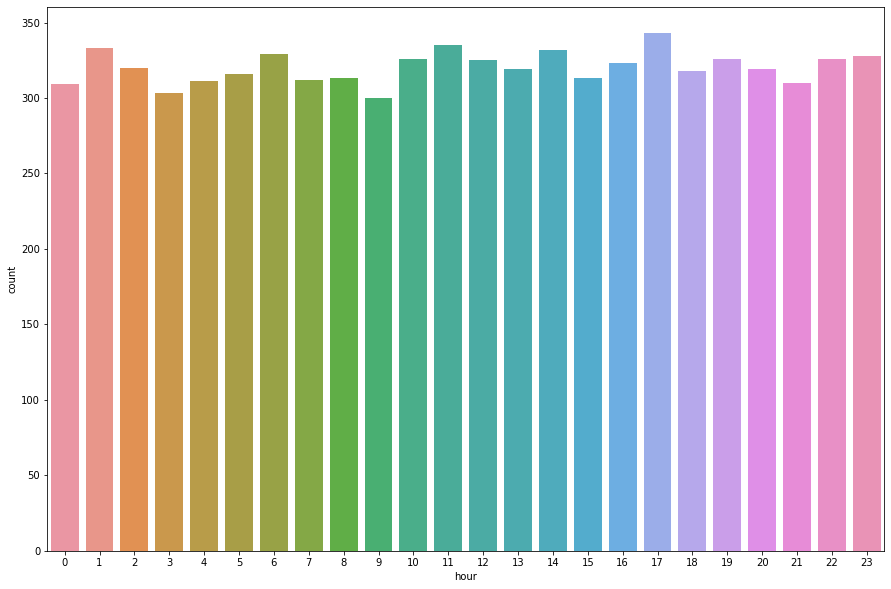

In [10]:
sns.countplot(x = df['hour'])

In [11]:
df['season'].value_counts()

3    1943
4    1925
2    1920
1    1901
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

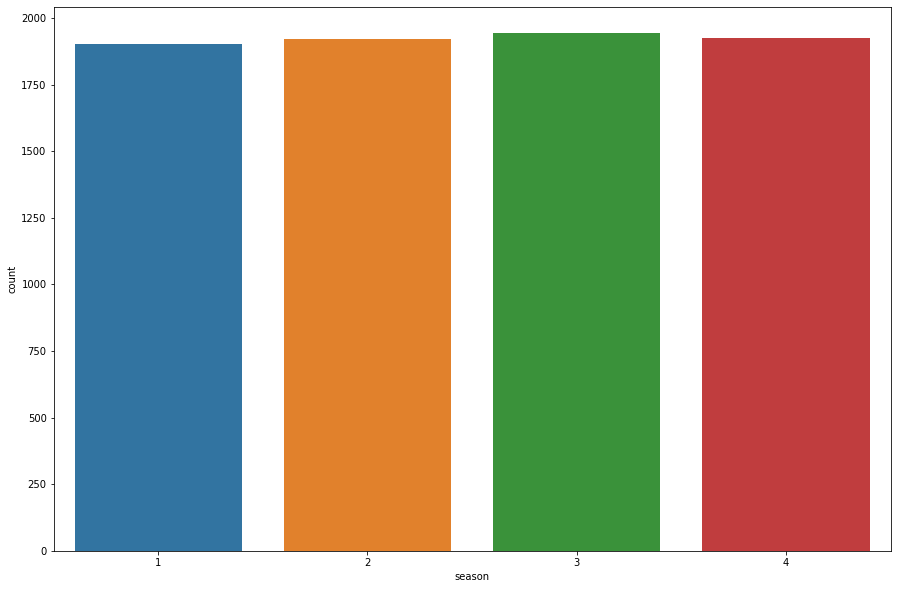

In [13]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['season'])


In [14]:
df['holiday'].value_counts()

0    7466
1     223
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

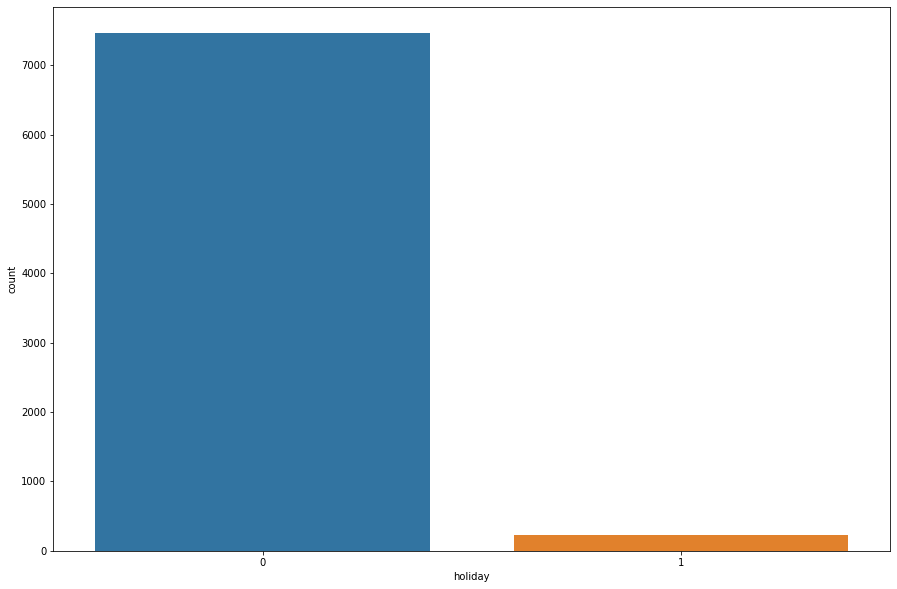

In [15]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['holiday'])

In [16]:
df['workingday'].value_counts()

1    5208
0    2481
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

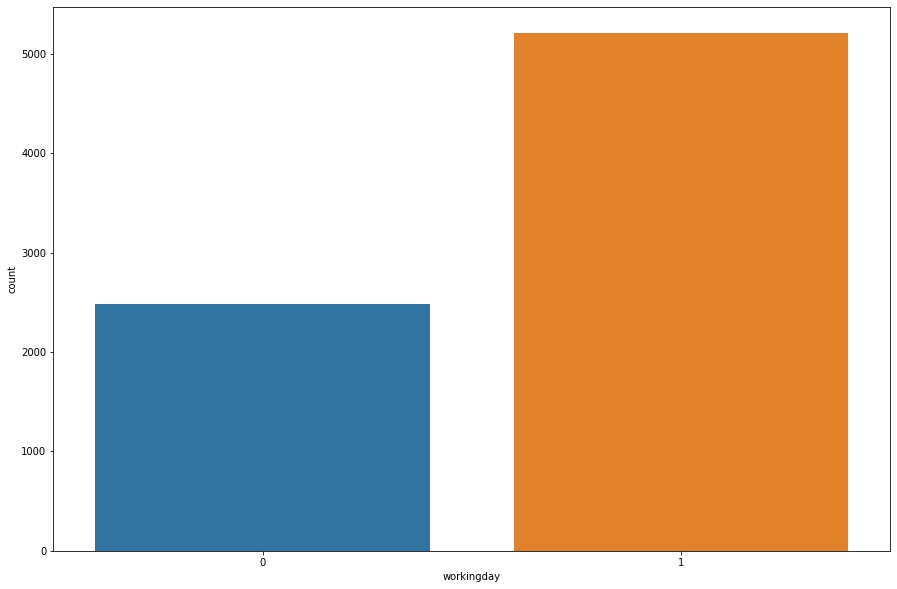

In [17]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['workingday'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

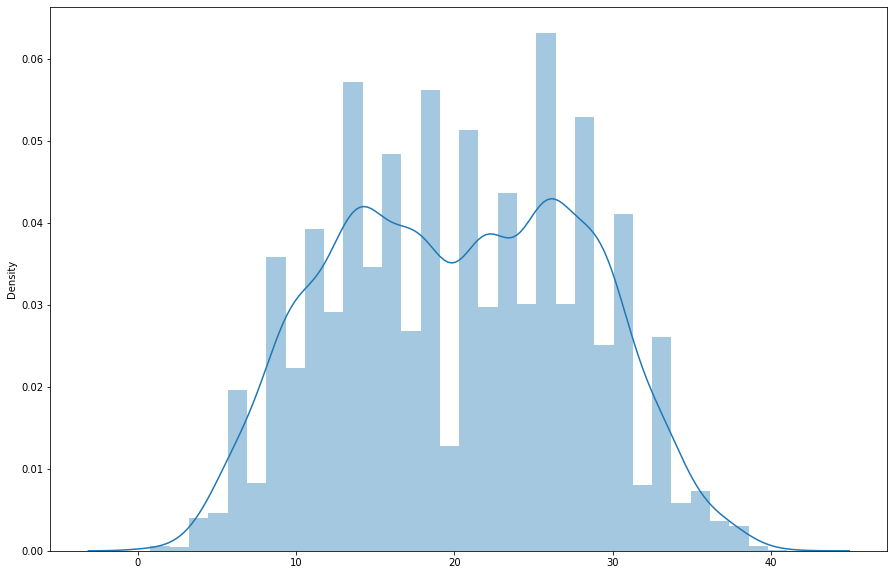

In [22]:
plt.figure(figsize = (15,10))
sns.distplot(x = df['temp'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

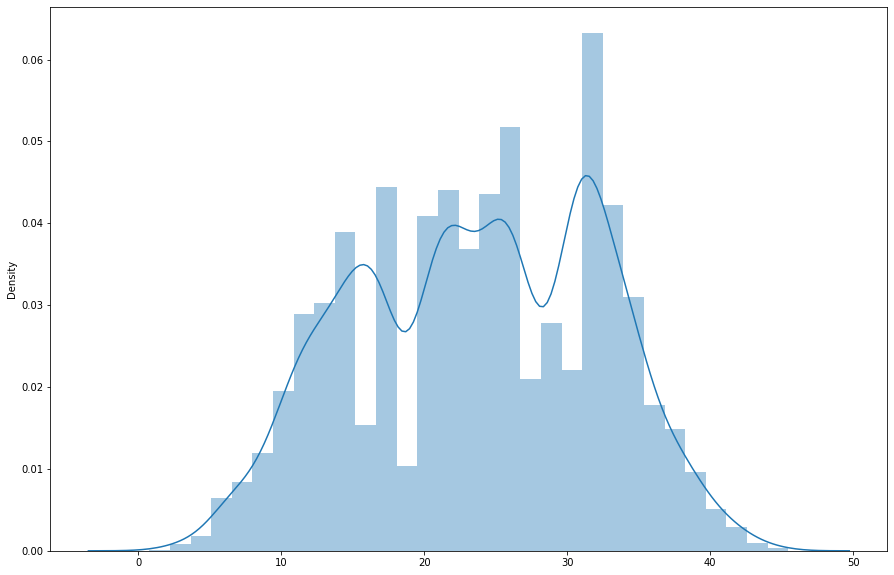

In [23]:
plt.figure(figsize = (15,10))
sns.distplot(x = df['atemp'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

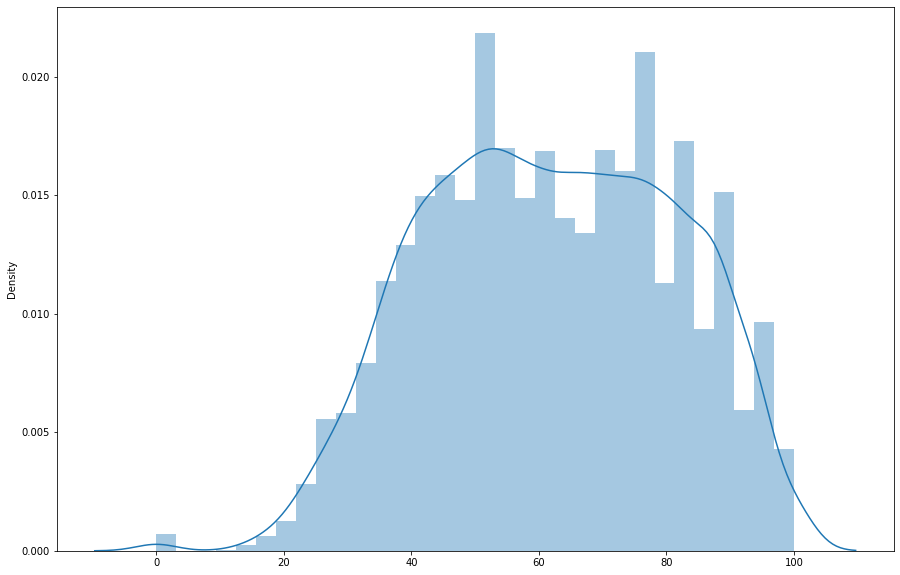

In [24]:
plt.figure(figsize = (15,10))
sns.distplot(x = df['humidity'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

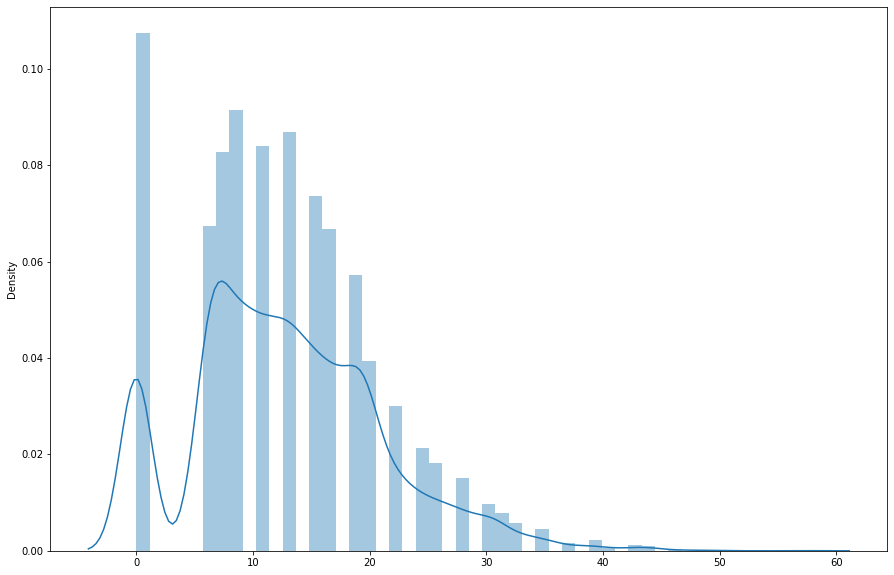

In [25]:
plt.figure(figsize = (15,10))
sns.distplot(x = df['windspeed'])